<a href="https://colab.research.google.com/github/sst2105/employee-salary-prediction/blob/main/Employee_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install streamlit pyngrok -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [3]:
data = pd.read_csv("/content/adult 3.csv")

In [4]:
print("📊 Dataset Information:")
print(f"Shape: {data.shape}")
print(f"Columns: {list(data.columns)}")
print("\n🔍 First 5 rows:")
data.head()


📊 Dataset Information:
Shape: (48842, 15)
Columns: ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

🔍 First 5 rows:


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].replace('?', 'Others')

In [6]:
if 'fnlwgt' in data.columns:
    data = data.drop('fnlwgt', axis=1)  # Not needed for prediction

# Remove rows with very low education levels (optional cleaning)
if 'education' in data.columns:
    data = data[~data['education'].isin(['1st-4th', '5th-6th', 'Preschool'])]

# Remove non-working categories from workclass
if 'workclass' in data.columns:
    data = data[~data['workclass'].isin(['Without-pay', 'Never-worked'])]

print(f"✅ After cleaning: {data.shape}")

✅ After cleaning: (47972, 14)


In [7]:
print("\n💰 Income Distribution:")
print(data['income'].value_counts())


💰 Income Distribution:
income
<=50K    36323
>50K     11649
Name: count, dtype: int64


In [8]:
data_original = data.copy()

categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('income')

label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le
    print(f"✅ Encoded: {column}")


target_encoder = LabelEncoder()
data['income'] = target_encoder.fit_transform(data['income'])

print("✅ All categorical variables encoded!")

✅ Encoded: workclass
✅ Encoded: education
✅ Encoded: marital-status
✅ Encoded: occupation
✅ Encoded: relationship
✅ Encoded: race
✅ Encoded: gender
✅ Encoded: native-country
✅ All categorical variables encoded!


In [9]:
X = data.drop('income', axis=1)
y = data['income']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"✅ Features prepared: {X.shape}")
print(f"✅ Target prepared: {y.shape}")


✅ Features prepared: (47972, 13)
✅ Target prepared: (47972,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✅ Training set: {X_train.shape}")
print(f"✅ Testing set: {X_test.shape}")

✅ Training set: (38377, 13)
✅ Testing set: (9595, 13)


In [12]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'y_pred': y_pred
    }

    print(f"✅ {name}: {accuracy:.4f}")

print("\n🏆 Model Training Complete!")

Training Logistic Regression...
✅ Logistic Regression: 0.8230
Training Random Forest...
✅ Random Forest: 0.8418
Training KNN...
✅ KNN: 0.8275
Training SVM...
✅ SVM: 0.8478
Training Gradient Boosting...
✅ Gradient Boosting: 0.8618

🏆 Model Training Complete!


In [13]:
print("\n📊 MODEL COMPARISON RESULTS:")
print("="*50)

# Sort models by accuracy
sorted_results = sorted(results.items(), key=lambda x: x[1]['accuracy'], reverse=True)

comparison_data = []
for name, result in sorted_results:
    comparison_data.append({
        'Model': name,
        'Accuracy': f"{result['accuracy']:.4f}",
        'Percentage': f"{result['accuracy']*100:.2f}%"
    })
    print(f"{name:20}: {result['accuracy']:.4f} ({result['accuracy']*100:.2f}%)")

# Best model
best_model_name = sorted_results[0][0]
best_model = results[best_model_name]['model']
best_accuracy = results[best_model_name]['accuracy']

print(f"\n🥇 BEST MODEL: {best_model_name}")
print(f"🎯 BEST ACCURACY: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")


📊 MODEL COMPARISON RESULTS:
Gradient Boosting   : 0.8618 (86.18%)
SVM                 : 0.8478 (84.78%)
Random Forest       : 0.8418 (84.18%)
KNN                 : 0.8275 (82.75%)
Logistic Regression : 0.8230 (82.30%)

🥇 BEST MODEL: Gradient Boosting
🎯 BEST ACCURACY: 0.8618 (86.18%)


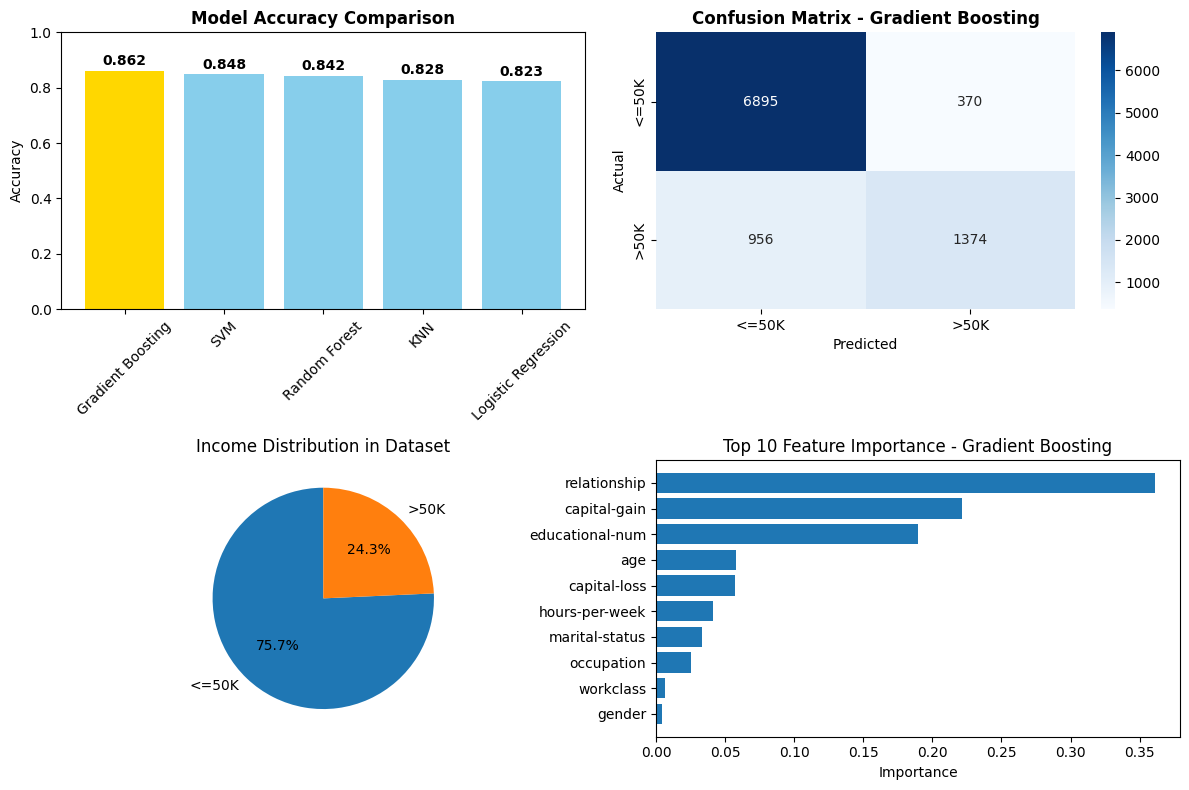

In [14]:
plt.figure(figsize=(12, 8))


plt.subplot(2, 2, 1)
model_names = [result[0] for result in sorted_results]
accuracies = [result[1]['accuracy'] for result in sorted_results]

colors = ['gold' if name == best_model_name else 'skyblue' for name in model_names]
bars = plt.bar(model_names, accuracies, color=colors)
plt.title('Model Accuracy Comparison', fontweight='bold')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)


for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')


plt.subplot(2, 2, 2)
cm = confusion_matrix(y_test, results[best_model_name]['y_pred'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title(f'Confusion Matrix - {best_model_name}', fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')


plt.subplot(2, 2, 3)
income_counts = data_original['income'].value_counts()
plt.pie(income_counts.values, labels=income_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Income Distribution in Dataset')


plt.subplot(2, 2, 4)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = best_model.feature_importances_
    feature_names = X.columns


    indices = np.argsort(feature_importance)[-10:]
    plt.barh(range(len(indices)), feature_importance[indices])
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.title(f'Top 10 Feature Importance - {best_model_name}')
    plt.xlabel('Importance')
else:
    plt.text(0.5, 0.5, 'Feature importance\nnot available for\nthis model',
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Feature Importance')

plt.tight_layout()
plt.show()

In [15]:
joblib.dump(best_model, 'best_salary_model.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(target_encoder, 'target_encoder.pkl')

print(f"\n💾 Best model ({best_model_name}) saved successfully!")
print("📁 Saved files:")
print("  - best_salary_model.pkl")
print("  - feature_scaler.pkl")
print("  - label_encoders.pkl")
print("  - target_encoder.pkl")


💾 Best model (Gradient Boosting) saved successfully!
📁 Saved files:
  - best_salary_model.pkl
  - feature_scaler.pkl
  - label_encoders.pkl
  - target_encoder.pkl


In [16]:
streamlit_code = '''
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Page config
st.set_page_config(page_title="Salary Predictor", page_icon="💰", layout="wide")

# Load saved models and preprocessors
@st.cache_resource
def load_models():
    model = joblib.load('best_salary_model.pkl')
    scaler = joblib.load('feature_scaler.pkl')
    label_encoders = joblib.load('label_encoders.pkl')
    target_encoder = joblib.load('target_encoder.pkl')
    return model, scaler, label_encoders, target_encoder

try:
    model, scaler, label_encoders, target_encoder = load_models()
    model_loaded = True
except:
    model_loaded = False

# Title
st.title("💰 Employee Salary Prediction App")
st.markdown("Predict whether an employee earns >50K or ≤50K")

if not model_loaded:
    st.error("❌ Model files not found! Please run the training code first.")
else:
    st.success("✅ Model loaded successfully!")

    # Sidebar inputs
    st.sidebar.header("👤 Employee Information")

    # Input fields (adjust based on your dataset columns)
    age = st.sidebar.slider("Age", 17, 90, 35)

    workclass = st.sidebar.selectbox("Work Class",
        ['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Others'])

    education = st.sidebar.selectbox("Education",
        ['Bachelors', 'HS-grad', 'Masters', 'Some-college', 'Assoc-voc', 'Doctorate', '11th', '9th', '7th-8th', '12th', '10th', 'Assoc-acdm', 'Prof-school'])

    marital_status = st.sidebar.selectbox("Marital Status",
        ['Married-civ-spouse', 'Never-married', 'Divorced', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'])

    occupation = st.sidebar.selectbox("Occupation",
        ['Tech-support', 'Craft-repair', 'Others', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces'])

    relationship = st.sidebar.selectbox("Relationship",
        ['Husband', 'Not-in-family', 'Wife', 'Own-child', 'Unmarried', 'Other-relative'])

    race = st.sidebar.selectbox("Race",
        ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'])

    sex = st.sidebar.selectbox("Gender", ['Male', 'Female'])

    hours_per_week = st.sidebar.slider("Hours per Week", 1, 99, 40)

    native_country = st.sidebar.selectbox("Native Country",
        ['United-States', 'Others'])

    # Additional fields that might be in your dataset
    education_num = st.sidebar.slider("Education Years", 1, 16, 10)
    capital_gain = st.sidebar.number_input("Capital Gain", 0, 99999, 0)
    capital_loss = st.sidebar.number_input("Capital Loss", 0, 4356, 0)

    # Main area
    col1, col2 = st.columns([2, 1])

    with col1:
        st.subheader("📊 Input Summary")

        input_data = {
            'Age': age,
            'Work Class': workclass,
            'Education': education,
            'Education Years': education_num,
            'Marital Status': marital_status,
            'Occupation': occupation,
            'Relationship': relationship,
            'Race': race,
            'Gender': sex,
            'Capital Gain': capital_gain,
            'Capital Loss': capital_loss,
            'Hours per Week': hours_per_week,
            'Native Country': native_country
        }

        # Display input data
        input_df = pd.DataFrame(list(input_data.items()), columns=['Feature', 'Value'])
        st.dataframe(input_df, use_container_width=True)

    with col2:
        st.subheader("🎯 Prediction")

        if st.button("🔮 Predict Salary", type="primary"):
            try:
                # Prepare input for prediction (adjust column names to match your dataset)
                prediction_input = pd.DataFrame({
                    'age': [age],
                    'workclass': [workclass],
                    'education': [education],
                    'education-num': [education_num],
                    'marital-status': [marital_status],
                    'occupation': [occupation],
                    'relationship': [relationship],
                    'race': [race],
                    'sex': [sex],
                    'capital-gain': [capital_gain],
                    'capital-loss': [capital_loss],
                    'hours-per-week': [hours_per_week],
                    'native-country': [native_country]
                })

                # Encode categorical variables
                for column in prediction_input.columns:
                    if column in label_encoders:
                        le = label_encoders[column]
                        try:
                            prediction_input[column] = le.transform(prediction_input[column].astype(str))
                        except ValueError:
                            # Handle unseen categories
                            prediction_input[column] = 0

                # Scale features
                input_scaled = scaler.transform(prediction_input)

                # Make prediction
                prediction = model.predict(input_scaled)[0]
                probability = model.predict_proba(input_scaled)[0]

                # Convert prediction back to original label
                prediction_label = target_encoder.inverse_transform([prediction])[0]

                # Display result
                if prediction_label == '>50K':
                    st.success(f"💰 **{prediction_label}**")
                    st.info(f"Confidence: {probability[prediction]:.1%}")
                    st.balloons()
                else:
                    st.info(f"💼 **{prediction_label}**")
                    st.info(f"Confidence: {probability[prediction]:.1%}")

                # Show probability chart
                fig, ax = plt.subplots(figsize=(6, 4))
                labels = target_encoder.classes_
                ax.bar(labels, probability, color=['lightcoral', 'lightgreen'])
                ax.set_title('Prediction Probabilities')
                ax.set_ylabel('Probability')
                for i, v in enumerate(probability):
                    ax.text(i, v + 0.02, f'{v:.1%}', ha='center', fontweight='bold')
                st.pyplot(fig)

            except Exception as e:
                st.error(f"❌ Prediction error: {str(e)}")

    # File upload for batch predictions
    st.markdown("---")
    st.subheader("📂 Batch Prediction")

    uploaded_file = st.file_uploader("Upload CSV file for batch predictions", type="csv")

    if uploaded_file is not None:
        batch_data = pd.read_csv(uploaded_file)
        st.write("**Data Preview:**")
        st.dataframe(batch_data.head())

        if st.button("🚀 Predict All"):
            # Add batch prediction logic here
            st.info("Batch prediction feature - implement based on your specific needs!")
'''


with open('streamlit_app.py', 'w', encoding='utf-8') as f:
    f.write(streamlit_code)

print("\n✅ Streamlit app created: streamlit_app.py")


✅ Streamlit app created: streamlit_app.py


In [ ]:
!streamlit run streamlit_app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.224.251.56:8501

